<a href="https://colab.research.google.com/github/Midun32/FDSFE_AAdesola/blob/main/CodesInClass/Copy_of_FDSfE_kmeans_24Oct23_for_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-22-94c4aa801e77>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Get Kaggle dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !chmod 600 REPLACEME
!chmod 600 kaggle.json

import json
# envs = json.load(open("REPLACEME", "r"))
# envs = json.load(open("kaggle.json", "r"))

json_path = "/content/drive/MyDrive/kaggle.json"

envs = json.load(open(json_path, "r"))

import os
# os.environ["KAGGLE_USERNAME"] = envs['REPLACEME']
# os.environ["KAGGLE_KEY"] = envs['REPLACEME']

os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "a2d9a4b2b06c3b6cf9bd466df4752cda"#user['key']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
chmod: cannot access 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37          10000        225  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          39393       1133  1.0              
willianoliveiragibin/healthcare-insurance                   Healthcare Insurance                               16KB  2023-10-12 20:24:09            721         22  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Datase

In [27]:
!kaggle datasets download -d camnugent/california-housing-prices -p /content/drive/MyDrive/FDSfE_F2023

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 25.6MB/s]


In [28]:
!unzip /content/drive/MyDrive/FDSfE_F2023/california-housing-prices.zip -d /content/drive/MyDrive/FDSfE_F2023

Archive:  /content/drive/MyDrive/FDSfE_F2023/california-housing-prices.zip
  inflating: /content/drive/MyDrive/FDSfE_F2023/housing.csv  


# Read dataset

In [30]:
df = pd.read_csv("/content/drive/MyDrive/FDSfE_F2023/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Select subset of data and scale it

In [31]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [32]:
X.describe()

,median_income,latitude,longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [33]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [34]:
scaler.transform(X)

array([[ 2.34476576,  1.05254828, -1.32783522],
       [ 2.33223796,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.03850269, -1.33282653],
       ...,
       [-1.14259331,  1.77823747, -0.8237132 ],
       [-1.05458292,  1.77823747, -0.87362627],
       [-0.78012947,  1.75014627, -0.83369581]])

In [36]:
X.columns

Index(['median_income', 'latitude', 'longitude'], dtype='object')

In [35]:
X[X.columns]

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [37]:
X[X.columns] = scaler.transform(X)
X.describe()

,median_income,latitude,longitude
count,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,-6.422871e-01,5.389137e-01
75%,4.593063e-01,9.729566e-01,7.784964e-01
max,5.858286e+00,2.958068e+00,2.625280e+00


# Cluster the data with kmeans

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_income  20640 non-null  float64
 1   latitude       20640 non-null  float64
 2   longitude      20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [41]:
X["Cluster"].astype("category")

0        1
1        1
2        1
3        1
4        3
        ..
20635    3
20636    3
20637    3
20638    3
20639    3
Name: Cluster, Length: 20640, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [40]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,median_income,latitude,longitude,Cluster
0,2.344766,1.052548,-1.327835,1
1,2.332238,1.043185,-1.322844,1
2,1.782699,1.038503,-1.332827,1
3,0.932968,1.038503,-1.337818,1
4,-0.012881,1.038503,-1.337818,3
...,...,...,...,...
20635,-1.216128,1.801647,-0.758826,3
20636,-0.691593,1.806329,-0.818722,3
20637,-1.142593,1.778237,-0.823713,3
20638,-1.054583,1.778237,-0.873626,3


# Visualize the clusters locations

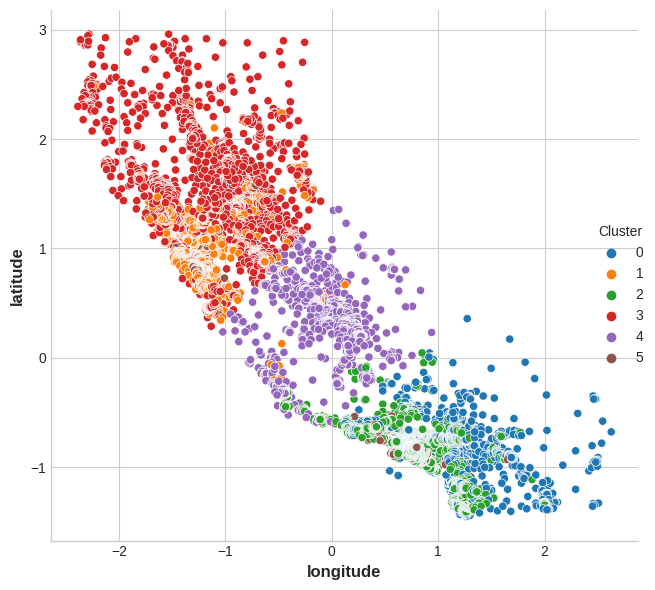

In [42]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
)

# Visualize the cluster values

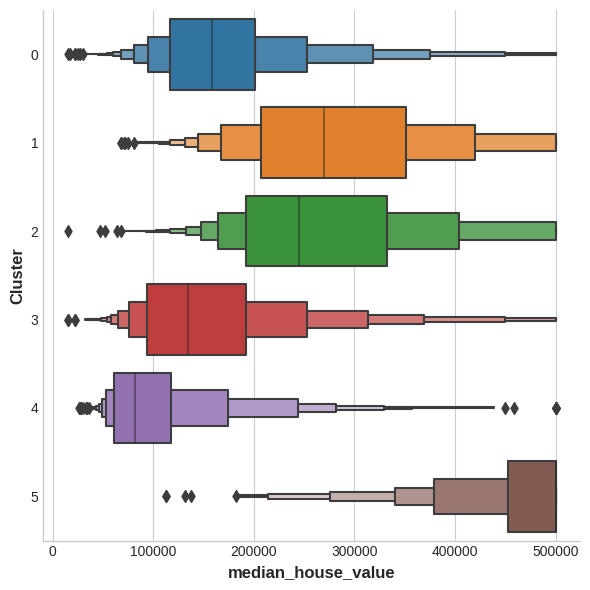

In [43]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6);